In [1]:
from pathlib import Path 
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
path = Path('/home/sonujha/rnd/Severstal-Steel-Defect-Detection/data')
os.listdir(path)

['train_images', 'train.csv', 'sample_submission.csv', 'test_images']

In [3]:
df = pd.read_csv(path/'train.csv')

In [4]:
df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [5]:
df = df.pivot(index='ImageId', columns='ClassId', values = 'EncodedPixels')
df.head()

ClassId,1,2,3,4
ImageId,,,,
0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN
0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN
000a4bcdd.jpg,37607 3 37858 8 38108 14 38359 20 38610 25 388...,NaN,NaN,NaN
000f6bf48.jpg,NaN,NaN,NaN,131973 1 132228 4 132483 6 132738 8 132993 11 ...
0014fce06.jpg,NaN,NaN,229501 11 229741 33 229981 55 230221 77 230468...,NaN


In [6]:
idx = 0

def get_mask(idx, df):
    image_id = df.iloc[idx].name
    labels = df.iloc[idx][:4]
    masks = np.zeros((256, 1600, 4), dtype=np.float32)
    
    for idx, label in enumerate(labels.values):
        if label is not np.nan:
            label = label.split()
            positions = map(int, label[0::2])
            length = map(int, label[1::2])
            mask = np.zeros((256*1600), dtype=np.uint8)
            for pos, le in zip(positions, length):
                mask[pos: (pos+le)] = 1
            masks[:, :, idx] = mask.reshape(256, 1600, order='F')
    return image_id, masks

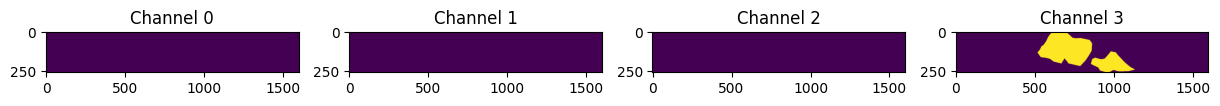

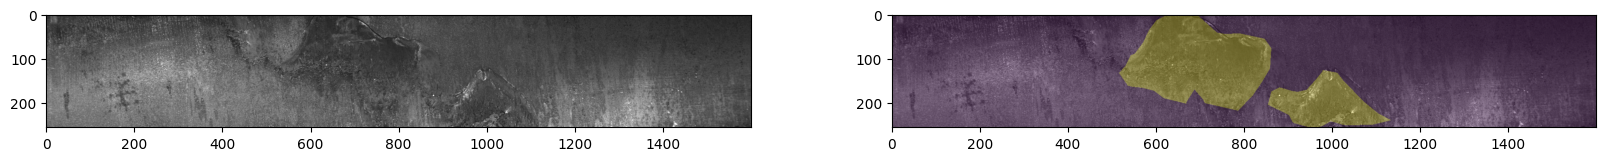

In [7]:
img_id, masks = get_mask(3, df)
img = np.array(Image.open(os.path.join(path, 'train_images', img_id)))

mask = masks[np.newaxis, ...]
mask = mask[0].transpose(2, 0, 1)
# OR Option 3: Show all channels side by side
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
    axes[i].imshow(mask[i])
    axes[i].set_title(f'Channel {i}')
plt.show()
plt.figure(figsize=(20, 50))
plt.subplot(1, 2, 1)
plt.imshow(img)


plt.subplot(1, 2, 2)
plt.imshow(img)
plt.imshow(mask[3], alpha=0.3)
plt.show()

In [8]:
masks.shape

(256, 1600, 4)

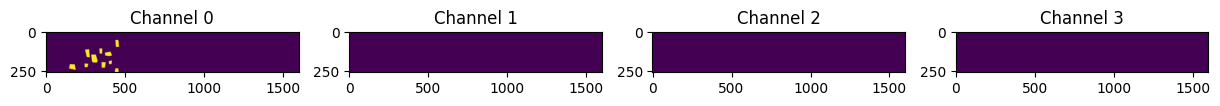

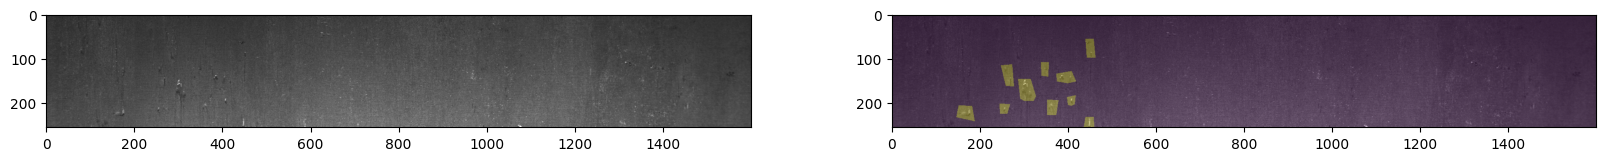

In [9]:
img_id, masks = get_mask(2, df)
img = np.array(Image.open(os.path.join(path, 'train_images', img_id)))

mask = masks[np.newaxis, ...]
mask = mask[0].transpose(2, 0, 1)
# OR Option 3: Show all channels side by side
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
    axes[i].imshow(mask[i])
    axes[i].set_title(f'Channel {i}')
plt.show()
plt.figure(figsize=(20, 50))
plt.subplot(1, 2, 1)
plt.imshow(img)


plt.subplot(1, 2, 2)
plt.imshow(img)
plt.imshow(mask[0], alpha=0.3)
plt.show()

In [10]:
pixels = masks.T.flatten()
pixels = np.concatenate([[0], pixels, [0]])
runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
runs[1::2] -= runs[::2]
' '.join(str(x) for x in runs)

'37608 3 37859 8 38109 14 38360 20 38611 25 38864 28 39120 28 39376 29 39632 29 39888 29 40144 29 40400 29 40656 30 40912 30 41168 30 41424 30 41680 31 41936 31 42192 31 42448 31 42704 31 42961 31 43217 31 43473 31 43729 31 43985 31 44241 32 44497 32 44753 32 45009 32 45265 33 45521 33 45777 33 46033 33 46289 33 46545 34 46804 31 47066 25 47328 19 47589 15 47851 9 48113 3 62668 12 62924 23 63180 23 63349 3 63436 23 63605 7 63692 23 63861 11 63948 23 64117 15 64204 23 64373 19 64460 23 64629 24 64716 23 64885 28 64972 23 65140 33 65228 23 65396 37 65484 23 65652 41 65741 22 65908 45 65997 22 66164 48 66253 22 66420 48 66509 22 66676 48 66765 22 66932 48 67021 22 67188 48 67277 20 67444 48 67533 16 67700 48 67789 13 67956 48 68045 9 68211 49 68301 6 68467 49 68557 2 68723 50 68979 50 69235 50 69491 50 69747 50 70010 43 70278 31 70546 19 70814 7 73364 5 73620 14 73876 23 74132 31 74388 40 74644 45 74900 46 75156 46 75412 47 75668 47 75924 48 76180 49 76436 49 76692 50 76948 50 77204 50 77

In [11]:
df.iloc[2]

ClassId
1    37607 3 37858 8 38108 14 38359 20 38610 25 388...
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: 000a4bcdd.jpg, dtype: object

In [12]:
pixels[:-1]

array([0., 0., 0., ..., 0., 0., 0.], shape=(1638401,))

In [13]:
runs[1::2] -= runs[::2]

In [15]:
# runs

# Metrics 

In [38]:
class Meter(object):
    '''A meter to keep track of iou and dice scores through an epoch'''

    def __init__(self, epoch):
        self.base_threshold = 0.5
        self.base_dice_scores = []
        self.dice_neg_scores = []
        self.dice_pos_scores = []
        self.iou_scores = []

    def update(self, targets, outputs):
        probs = torch.sigmoid(outputs)
        dice, dice_neg, dice_pos, _, _ = metric(
            probs, targets, self.base_threshold)
        self.base_dice_scores.extend(dice.tolist())
        self.dice_pos_scores.extend(dice_pos.tolist())
        self.dice_neg_scores.extend(dice_neg.tolist())
        preds = predict(probs, self.base_threshold)
        iou = compute_iou_batch(preds, targets, classes=[1])
        self.iou_scores.append(iou)

    def get_metric(self):
        dice = np.nanmean(self.base_dice_scores)
        dice_neg = np.nanmean(self.dice_neg_scores)
        dice_pos = np.nanmean(self.dice_pos_scores)
        dices = [dice, dice_neg, dice_pos]
        iou = np.nanmean(self.iou_scores)
        return dices, iou